# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = {"q": city, "units": "metric", "APPID": weather_api_key}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params = city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | moranbah
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | qalat
Processing Record 5 of Set 1 | mbandaka
Processing Record 6 of Set 1 | holualoa
Processing Record 7 of Set 1 | butterworth
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | poletayevo
Processing Record 10 of Set 1 | bubaque
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | vilyuysk
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | tanjung pandan
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | gargalianoi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | golfito
Processing Record 22 of Set 1 | stanley
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.01,83,58,5.63,PN,1733238451
1,moranbah,-22.0016,148.0466,23.84,76,100,5.96,AU,1733238452
2,margaret river,-33.9500,115.0667,17.35,77,94,6.19,AU,1733238453
3,qalat,32.1058,66.9083,8.39,42,1,2.69,AF,1733238455
4,mbandaka,0.0487,18.2603,30.15,57,44,1.83,CD,1733238456


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.01,83,58,5.63,PN,1733238451
1,moranbah,-22.0016,148.0466,23.84,76,100,5.96,AU,1733238452
2,margaret river,-33.9500,115.0667,17.35,77,94,6.19,AU,1733238453
3,qalat,32.1058,66.9083,8.39,42,1,2.69,AF,1733238455
4,mbandaka,0.0487,18.2603,30.15,57,44,1.83,CD,1733238456


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

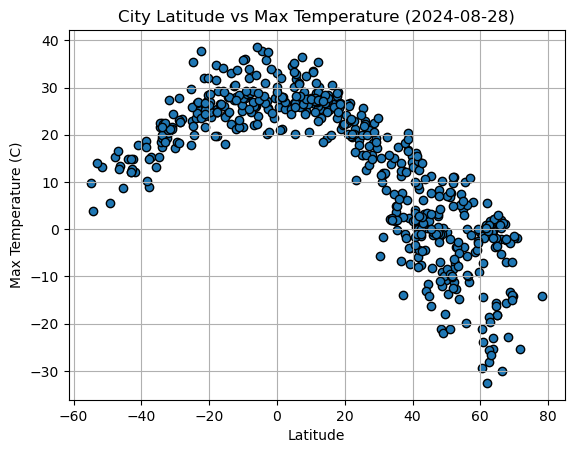

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2024-08-28)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

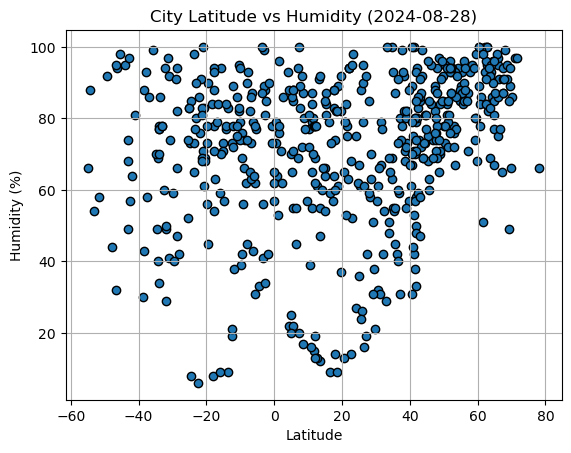

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-08-28)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

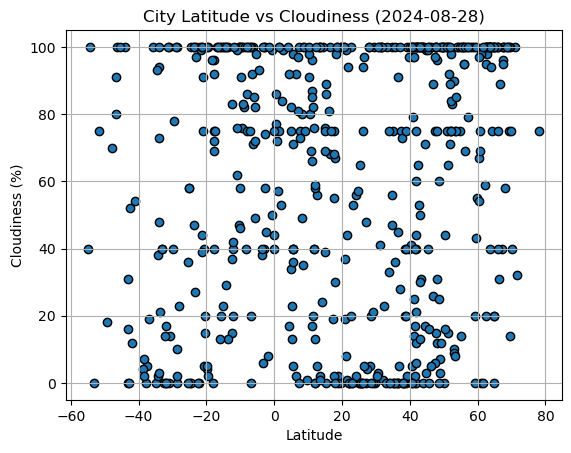

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-08-28)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

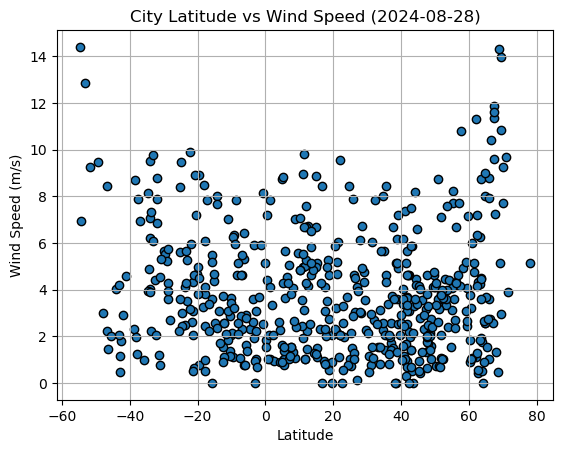

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-08-28)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# required variables for x-axis and y-axis of the plot
x_label = "X Label"
x_values = [0,1,2]

y_label = "Y Label"
y_values = [0,1,2]

def add_lin_reg_plot(x_label, x_values, y_label, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors='black')

    # Create and plot the regression line
    reg_line = x_values * slope + intercept
    plt.plot(x_values, reg_line, color='r')

    # Add labels and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label}")

    # Set the Annotation Equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Annotate in lower or upper left corner, based on slope
    if slope >=0:
        plt.annotate(line_eq,(min(x_values),max(y_values)*.9),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

# Show the R^2 Value
    print(f"The r^2-value is: {rvalue**2}")

    # Show the plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,qalat,32.1058,66.9083,8.39,42,1,2.69,AF,1733238455
4,mbandaka,0.0487,18.2603,30.15,57,44,1.83,CD,1733238456
5,holualoa,19.6228,-155.9522,22.15,37,0,2.06,US,1733238363
6,butterworth,5.3991,100.3638,26.02,88,40,1.03,MY,1733238345
8,poletayevo,55.0336,61.1138,-3.70,89,14,3.14,RU,1733238460


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.01,83,58,5.63,PN,1733238451
1,moranbah,-22.0016,148.0466,23.84,76,100,5.96,AU,1733238452
2,margaret river,-33.9500,115.0667,17.35,77,94,6.19,AU,1733238453
7,flying fish cove,-10.4217,105.6791,26.25,82,100,1.37,CX,1733238459
11,west island,-12.1568,96.8225,27.99,89,20,2.57,CC,1733238464


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7441280556610259


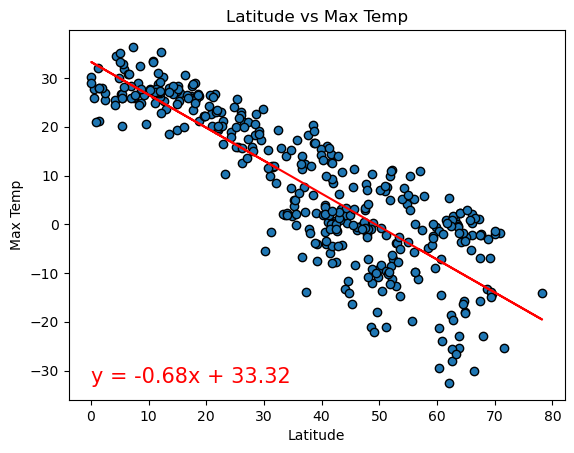

In [16]:
# Linear regression on Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Max Temp"
y_values = northern_hemi_df["Max Temp"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.5751787065916818


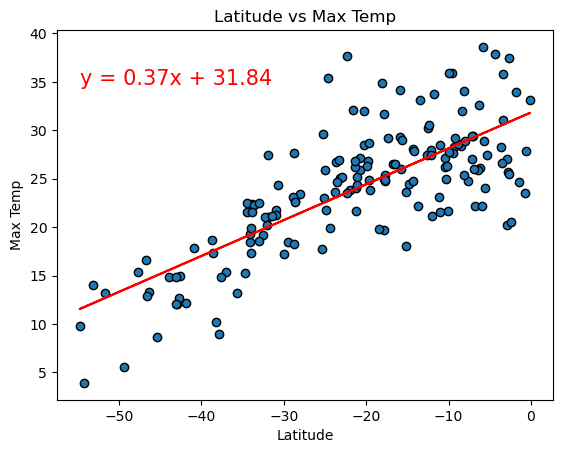

In [23]:
# Linear regression on Southern Hemisphere
# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Max Temp"
y_values = southern_hemi_df["Max Temp"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1621006589280036


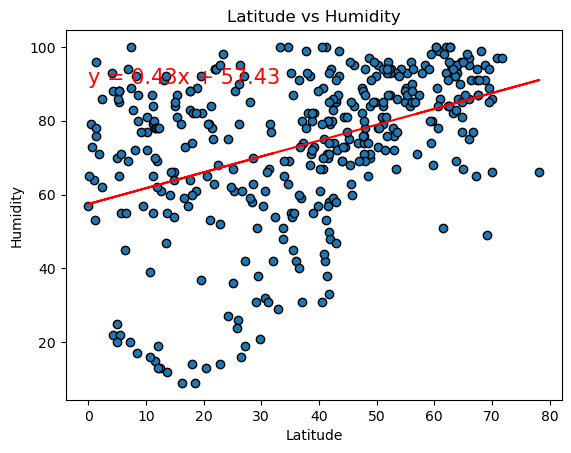

In [24]:
# Northern Hemisphere

# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Humidity"
y_values = northern_hemi_df["Humidity"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)


The r^2-value is: 3.485770065809634e-05


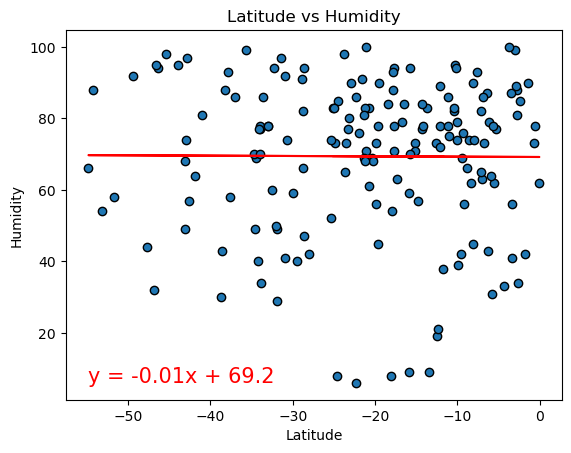

In [25]:
# Southern Hemisphere
# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Humidity"
y_values = southern_hemi_df["Humidity"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.031370164624625656


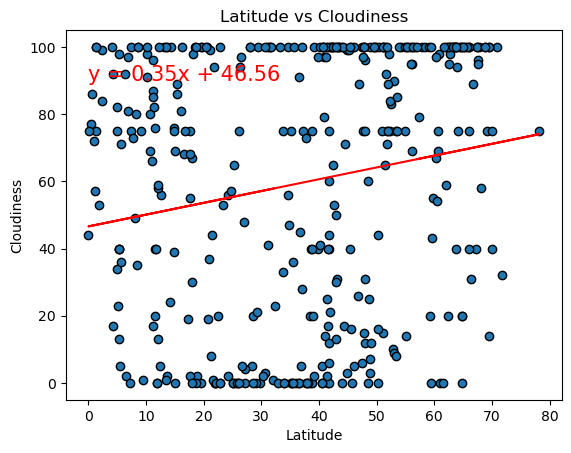

In [26]:
# Northern Hemisphere
x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Cloudiness"
y_values = northern_hemi_df["Cloudiness"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.07462576360108605


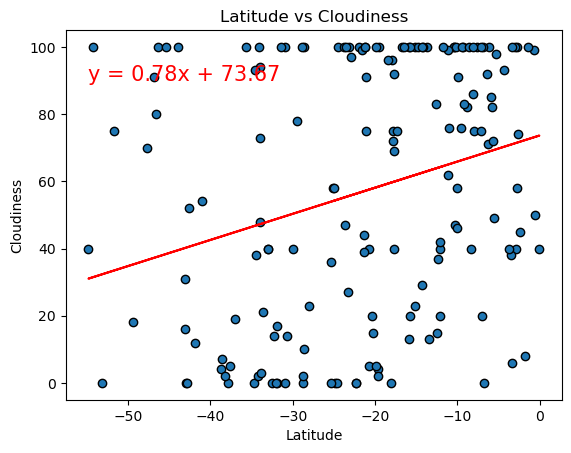

In [27]:
# Southern Hemisphere
# required variables for x-axis and y-axis of the plot
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Cloudiness"
y_values = southern_hemi_df["Cloudiness"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.023909825091334234


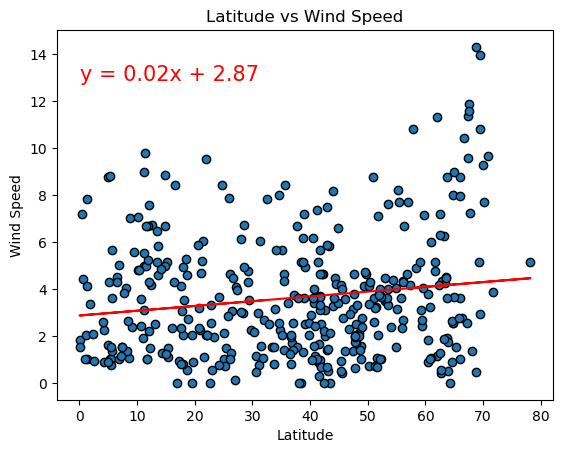

In [28]:
# Northern Hemisphere

x_label = "Latitude"
x_values = northern_hemi_df["Lat"]

y_label = "Wind Speed"
y_values = northern_hemi_df["Wind Speed"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)

The r^2-value is: 0.09729045496491806


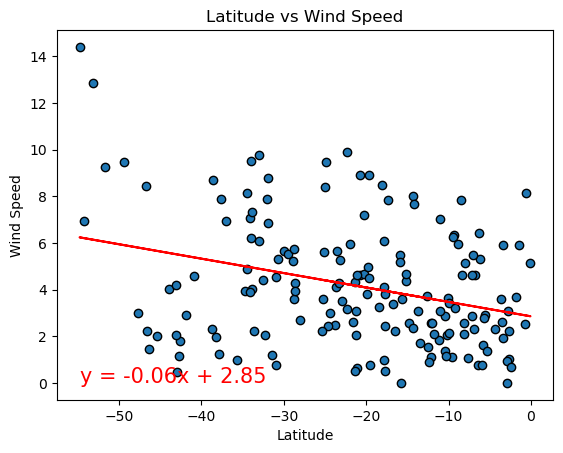

In [29]:
# Southern Hemisphere
x_label = "Latitude"
x_values = southern_hemi_df["Lat"]

y_label = "Wind Speed"
y_values = southern_hemi_df["Wind Speed"]

# linear regression function created previously
add_lin_reg_plot(x_label, x_values, y_label, y_values)